<a href="https://colab.research.google.com/github/zaephaer/MLU-08-Iris-SVM/blob/main/Iris_SVM_Polynomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine (SVM) using Polynomial Kernel

In [20]:
# Load library
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')
import sys
import sklearn

print("Numpy version: ", np.__version__)
print("Panda version: ", pd.__version__)
print("System version: ", sys.version)
print("Sklearn version: ", sklearn.__version__)

Numpy version:  1.19.5
Panda version:  1.1.5
System version:  3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
Sklearn version:  0.22.2.post1


In [21]:
# Load dataset
df = sns.load_dataset('iris')

# Define Feature and Target

In [22]:
# Select all variables as features
#col = ['sepal_length','sepal_width','petal_length','petal_width']
col = ['petal_length','petal_width']
X = df.loc[:, col]

# To see target unique output
df.species.unique()
# Convert target output into integer
species_to_num = {'setosa': 0,'versicolor': 1,'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

# Polynomial Kernel Visualization

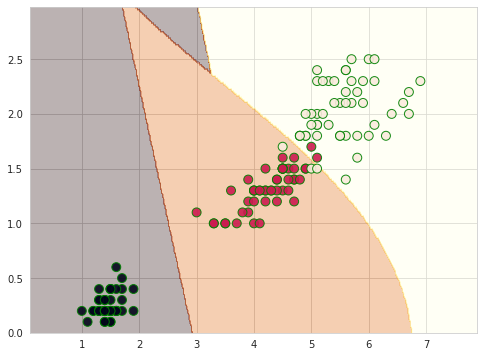

In [23]:
from sklearn import svm
C = 1.0
clf = svm.SVC(kernel='poly', degree=3, C=C, gamma='auto')
clf.fit(X, y)

Xv = X.values.reshape(-1,1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(8,6))
ax = plt.contourf(xx, yy, z, cmap = 'afmhot', alpha=0.3);
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, 
            alpha=0.9, edgecolors='g');

# Polynomial SVM Implementation

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8, 
                                                    random_state=0)

# Scaling feature
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_std_train = sc_x.fit_transform(X_train)

from sklearn import svm
C = 1.0 #0.01
clf = svm.SVC(kernel='poly', degree=10, C=C, gamma='auto') #5
clf.fit(X_std_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=10, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Cross Validation within Train Dataset

In [25]:
from sklearn.model_selection import cross_val_score
res = cross_val_score(clf, X_std_train, y_train, cv=10, scoring='accuracy')
print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(clf, X_std_train, y_train, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_train_pred)

Average Accuracy: 	 0.7833
Accuracy SD: 		 0.1404


array([[35,  0,  4],
       [ 0, 37,  0],
       [ 7, 18, 19]])

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Precision Score: \t {0:.4f}".format(precision_score(y_train, 
                                                           y_train_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_train,
                                                     y_train_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_train,
                                             y_train_pred, 
                                             average='weighted')))

Precision Score: 	 0.7812
Recall Score: 		 0.7583
F1 Score: 		 0.7368


# Cross Validation within Test Dataset

In [27]:
y_test_pred = cross_val_predict(clf, sc_x.transform(X_test), y_test, cv=3)

confusion_matrix(y_test, y_test_pred)

array([[10,  0,  1],
       [ 0, 13,  0],
       [ 3,  3,  0]])

In [28]:
print("Precision Score: \t {0:.4f}".format(precision_score(y_test, 
                                                           y_test_pred, 
                                                           average='weighted')))
print("Recall Score: \t\t {0:.4f}".format(recall_score(y_test,
                                                     y_test_pred, 
                                                     average='weighted')))
print("F1 Score: \t\t {0:.4f}".format(f1_score(y_test,
                                             y_test_pred, 
                                             average='weighted')))

Precision Score: 	 0.6341
Recall Score: 		 0.7667
F1 Score: 		 0.6941
